# Social Vulnerability Index

## About the data
CDC's Social Vulnerability Index (SVI) uses 15 variables at the census tract level. The data comes from the U.S. decennial census for the years 2000 & 2010, and the American Community Survey (ACS) for the years 2014, 2016, and 2018. It is a hierarchical additive index (Tate, 2013), with the component elements of CDC’s SVI including the following for 4 themes: Socioeconomic Status, Household Composition & Disability, Minority Status & Language, and Housing Type & Transportation.

SVI indicates the relative vulnerability of every U.S. Census tract–subdivisions of counties for which the Census collects statistical data. SVI ranks the tracts on 15 social factors, including unemployment, minority status, and disability, and further groups them into four related themes. Thus, each tract receives a ranking for each Census variable and for each of the four themes, as well as an overall ranking.

## Scientific research
The SVI Overall Score provides the overall, summed social vulnerability score for a given tract. The Overall Score SVI Grid is part of the U.S. Census Grids collection, and displays the Center for Disease Control & Prevention (CDC) SVI score. Funding for the final development, processing and dissemination of this data set by the Socioeconomic Data and Applications Center (SEDAC) was provided under the U.S. National Aeronautics and Space Administration (NASA)¹.

The Overall SVI Score describes the vulnerability in a given county tract based on the combined percentile ranking of the four SVI scores (Socioeconomic Status, Household Composition & Disability, Minority Status & Language, and Housing Type & Transportation). The summed percentile ranking from the four themes is ordered, and then used to calculate an overall percentile ranking, ranging from 0 (less vulnerable) to 1 (more vulnerable)². Tracts with higher Overall SVI Scores typically rank high in other SVI domains, and reveal communities that may require extra support, resources, and preventative care in order to better prepare for and manage emergency situations.

## Interpreting the data
The Overall SVI Score describes the vulnerability in a given county tract based on the combined percentile ranking of the four SVI scores (Socioeconomic Status, Household Composition & Disability, Minority Status & Language, and Housing Type & Transportation). The summed percentile ranking from the four themes is ordered, and then used to calculate an overall percentile ranking, ranging from 0 (less vulnerable) to 1 (more vulnerable)². Tracts with higher Overall SVI Scores typically rank high in other SVI domains, and reveal communities that may require extra support, resources, and preventative care in order to better prepare for and manage emergency situations.

## Credits
Center for International Earth Science Information Network, (CIESIN), Columbia University. 2021. Documentation for the U.S. Social Vulnerability Index Grids. Palisades, NY: NASA Socioeconomic Data and Applications Center (SEDAC). https://doi.org/10.7927/fjr9-a973. Accessed 13 May 2022.

Centers for Disease Control and Prevention/ Agency for Toxic Substances and Disease Registry/ Geospatial Research, Analysis, and Services Program. CDC/ATSDR Social Vulnerability Index Database. https://www.atsdr.cdc.gov/placeandhealth/svi/documentation/pdf/SVI2018Documentation_01192022_1.pdf

## Approach

1. Use `pystac_client` to open the STAC catalog 
2. Iterate over collections and print the title of each collection
3. Pick a collection, explore its metadata
4. List items within the collection
5. Pick an item and explore its metadata
6. Visualize the item using TiTiler

Let's import all the necessary libraries

In [54]:
# imports
import requests
from pystac_client import Client
import folium

# For displaying image in a jupyter notebook
from IPython.display import Image, display

## Open STAC catalog

In [55]:
STAC_API_URL = "https://stac.grss.cloud/"
catalog = Client.open(STAC_API_URL)

## List collections

In [56]:
collections = catalog.get_collections()
collections = list(collections)

In [57]:
for collection in collections:
    # print(f">> {collection.id}: \n- {collection.description}\n")
    
    print(">> " + collection.id)
    print("- " + collection.description + "\n")

>> social-vulnerability-index-overall
- Overall Social Vulnerability Index - Percentile ranking

>> sentinel-2-water-mask
- Water mask created from sentinel-2 cogs using the green and nir bands

>> watermask-from-sentinel-2
- Water mask created from sentinel-2 cogs using the green and nir bands

>> sentinel-2-l2a-california
- Global Sentinel-2 data from the Multispectral Instrument (MSI) onboard Sentinel-2

>> sentinel-2-l2a
- Global Sentinel-2 data from the Multispectral Instrument (MSI) onboard Sentinel-2

>> sentinel-2-l2a-cali
- Global Sentinel-2 data from the Multispectral Instrument (MSI) onboard Sentinel-2

>> test2
- This is a test collection

>> test3
- This is a test collection

>> test4
- This is a test collection

>> test1
- This is a test collection

>> test6
- This is a test collection

>> test7
- This is a test collection



## Explore a collection/item

In [58]:
collection_id = "social-vulnerability-index-overall"
collection = catalog.get_collection(collection_id)
collection

<CollectionClient id=social-vulnerability-index-overall>

Let's look at items within the collection

In [59]:
# get_items
items = list(collection.get_items())

In [60]:
for item in items[:10]:
    print(item)

<Item id=svi_2018_tract_overall_wgs84_cog>
<Item id=svi_2016_tract_overall_wgs84_cog>
<Item id=svi_2014_tract_overall_wgs84_cog>
<Item id=svi_2010_tract_overall_wgs84_cog>
<Item id=svi_2000_tract_overall_wgs84_cog>


In [61]:
item = collection.get_item(items[0].id)
item

<Item id=svi_2018_tract_overall_wgs84_cog>

## Visualize using TiTiler

Let's get the link to the cloud optimized geotiff from the item above

In [62]:
asset = "cog_default"
asset_url = item.assets["cog_default"].href
asset_url

's3://climatedashboard-data/social_vulnerability_index/svi_2018_tract_overall_wgs84_cog.tif'

Define the TiTiler URl

In [70]:
# Define the TiTiler url
RASTER_API_URL = "https://raster.grss.cloud/"

In [71]:
rescale = "0,1"
colormap = "ylgnbu"


In [72]:
# TiTiler preview endpoint
cog_preview = f"cog/preview.png?url={asset_url}&colormap_name={colormap}&rescale={rescale}"

User `requests.get` to make a GET request for the preview

In [73]:
response = requests.get(f"{RASTER_API_URL}{cog_preview}")
response

<Response [200]>

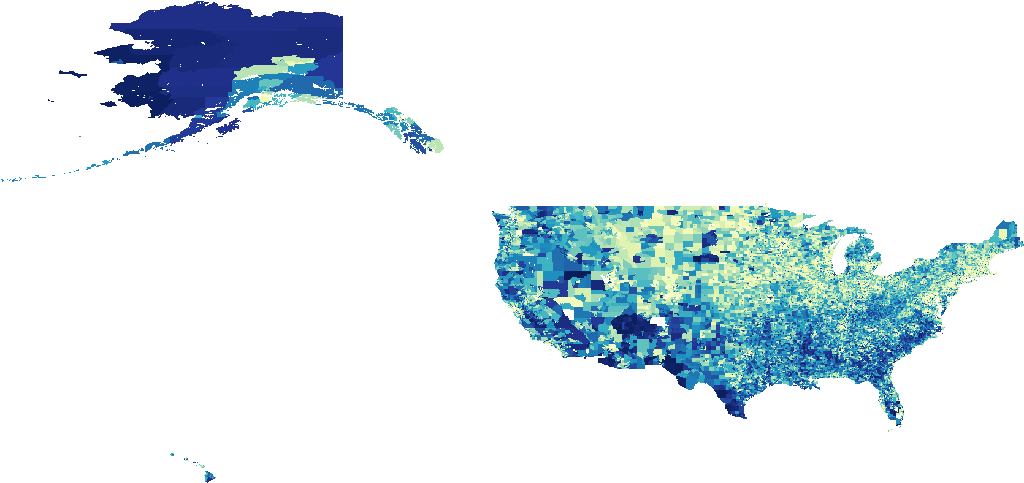

In [74]:
display(Image(response.content))

## Visualize the tiles in an interactive map

In [75]:
tiles = requests.get(
    f"{RASTER_API_URL}/stac/tilejson.json?collection={collection_id}&item={item.id}&assets={asset}&colormap_name={colormap}&rescale={rescale}"
).json()

In [76]:
tiles

{'tilejson': '2.2.0',
 'version': '1.0.0',
 'scheme': 'xyz',
 'tiles': ['https://ducbzwnzhb.execute-api.us-west-2.amazonaws.com/stac/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?collection=social-vulnerability-index-overall&item=svi_2018_tract_overall_wgs84_cog&assets=cog_default&colormap_name=ylgnbu&rescale=0%2C1'],
 'minzoom': 0,
 'maxzoom': 24,
 'bounds': [-178.23333334, 18.908332897999998, -66.958333785, 71.383332688],
 'center': [-122.59583356249999, 45.145832793, 0]}

In [83]:
m = folium.Map(
    location=[38.4393781,-107.225043],
    zoom_start=3,
    scroll_wheel_zoom=True, 
    tiles="OpenStreetMap", 
    attr="VEDA", 
    minzoom=0, 
    maxzoom=18,
)

map_layer = folium.TileLayer(
    tiles=tiles["tiles"][0],
    attr="VEDA", opacity = 0.7
)

# Add the layer to the map
map_layer.add_to(m)

In [84]:
m